In [ ]:
import os
import imageio
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
import cv2

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []
cls=-1

In [ ]:
for name in os.listdir("/content/drive/MyDrive/training"):
  cls+=1
  i=0
  for img in os.listdir(os.path.join("/content/drive/MyDrive/training",name)):
    img = imageio.imread(os.path.join("/content/drive/MyDrive/training",name,img))
    resized_image = cv2.resize(img, (128,128)) 
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    if i<175:
      X_train.append(gray)
      y_train.append(cls)
    else:
      X_test.append(gray)
      y_test.append(cls)
    i+=1
    

In [ ]:
X_train = np.array(X_train,dtype='float32')/255
y_train = np.array(y_train)
X_test = np.array(X_test,dtype='float32')/255
y_test = np.array(y_test)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(525, 128, 128) (525,)
(76, 128, 128) (76,)


In [ ]:
print(np.any(np.isnan(X_test)))
print(np.any(np.isnan(y_test)))

False
False


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

In [ ]:
x_train, x_valid, y_train, y_valid= train_test_split(X_train, y_train, test_size=0.2, random_state=1234)

In [ ]:
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(420, 128, 128) (105, 128, 128) (420,) (105,)


In [ ]:
im_rows=128
im_cols=128
batch_size=265
im_shape=(im_rows, im_cols,1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = X_test.reshape(X_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

In [ ]:
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_valid shape: {}'.format(x_valid.shape))

x_train shape: (420, 128, 128, 1)
x_test shape: (76, 128, 128, 1)
x_valid shape: (105, 128, 128, 1)


In [ ]:
print(type(x_train))

<class 'numpy.ndarray'>


In [ ]:
# from keras.utils import to_categorical
# y_train=to_categorical(y_train)
# y_test=to_categorical(y_test)
# y_valid=to_categorical(y_valid)

In [ ]:
#used model
cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=3, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=2, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    #20 is the number of outputs
    Dense(2, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),#Adam(lr=0.001)
    metrics=['accuracy']
)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(128,128,1)))
model.add(Activation("relu"))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(64, (1, 1)))
model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(128, (3, 3)))
model.add(Dropout(0.3))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (1, 1)))
model.add(Activation("relu"))

model.add(Flatten())
model.add(Dense(32))
model.add(Dense(3))
model.add(Activation("softmax"))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(
    np.array(x_train), np.array(y_train),
    batch_size=32,
    epochs=25,
    shuffle=True,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/25
14/14 [==============================] - 2s 133ms/step - loss: 4.0251 - accuracy: 0.7295 - val_loss: 2.3733 - val_accuracy: 0.2952
Epoch 2/25
14/14 [==============================] - 2s 122ms/step - loss: 0.3370 - accuracy: 0.9858 - val_loss: 6.2437 - val_accuracy: 0.2952
Epoch 3/25
14/14 [==============================] - 2s 121ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.0189 - val_accuracy: 0.2952
Epoch 4/25
14/14 [==============================] - 2s 121ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.9511 - val_accuracy: 0.2952
Epoch 5/25
14/14 [==============================] - 2s 120ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.2425 - val_accuracy: 0.3905
Epoch 6/25
14/14 [==============================] - 2s 121ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.7285 - val_accuracy: 0.5048
Epoch 7/25
14/14 [==============================] - 2s 122ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3351 - val_acc

In [ ]:
scor = model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.0000
test acc 1.0000


In [ ]:
image = imageio.imread("/content/drive/MyDrive/training/Vasudev/Vasudev-21.png")
#image = imageio.imread("/content/drive/MyDrive/training/vishvesh/vishvesh-124.png")
#image = imageio.imread("/content/drive/MyDrive/training/shashank/shashank-121.png")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized_img = cv2.resize(gray,(128,128))
img = asarray(gray)/255
img = np.resize(img,(128,128,1))
img = img.reshape(-1,128,128,1)
pred = model.predict(img)
print(pred)

[[5.7645629e-20 1.0000000e+00 1.2020313e-16]]


In [ ]:
ynew = model.predict_classes(x_test)


Acc=accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


accuracy : 
1.0


In [ ]:
model.save('drive/MyDrive/model_np3.h5')

In [ ]:
from tensorflow.keras.models import load_model
cnn_model = load_model("/content/drive/MyDrive/model_np5")

In [ ]:
import cv2
import imageio
import numpy as np

In [ ]:
#image = imageio.imread('ghg.jpg')
image = imageio.imread("drive/MyDrive/training/shashank/shashank-19.png")
image = imageio.imread("drive/MyDrive/training/vishvesh/vishvesh-100.png")
image = imageio.imread("drive/MyDrive/training/Vasudev/Vasudev-200.png")

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
image = cv2.imread('ghg.jpg')
resized_img = cv2.resize(image,(128,128))
gray = cv2.cvtColor(resized_img,cv2.COLOR_BGR2GRAY)
img = np.reshape(gray,(-1,128,128,1))
img = np.array(img)/255
pred = model.predict(img)
print(pred[0].argmax())
print(pred)

1
[[5.9617494e-05 9.9994040e-01 9.9995061e-11]]


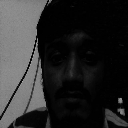

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(gray)